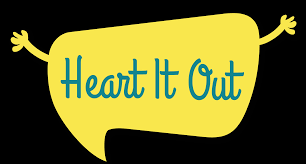

# Task1 -- Write SQL queries which will return:


**1. The number of employees who have been department managers.**


**2. The number of employees who have only worked in one department.**


**3. The department who has had the most number of managers.**


**4. The age group which has the highest average salary.**


**5. All the rows of the ‘manager’ table twice.**

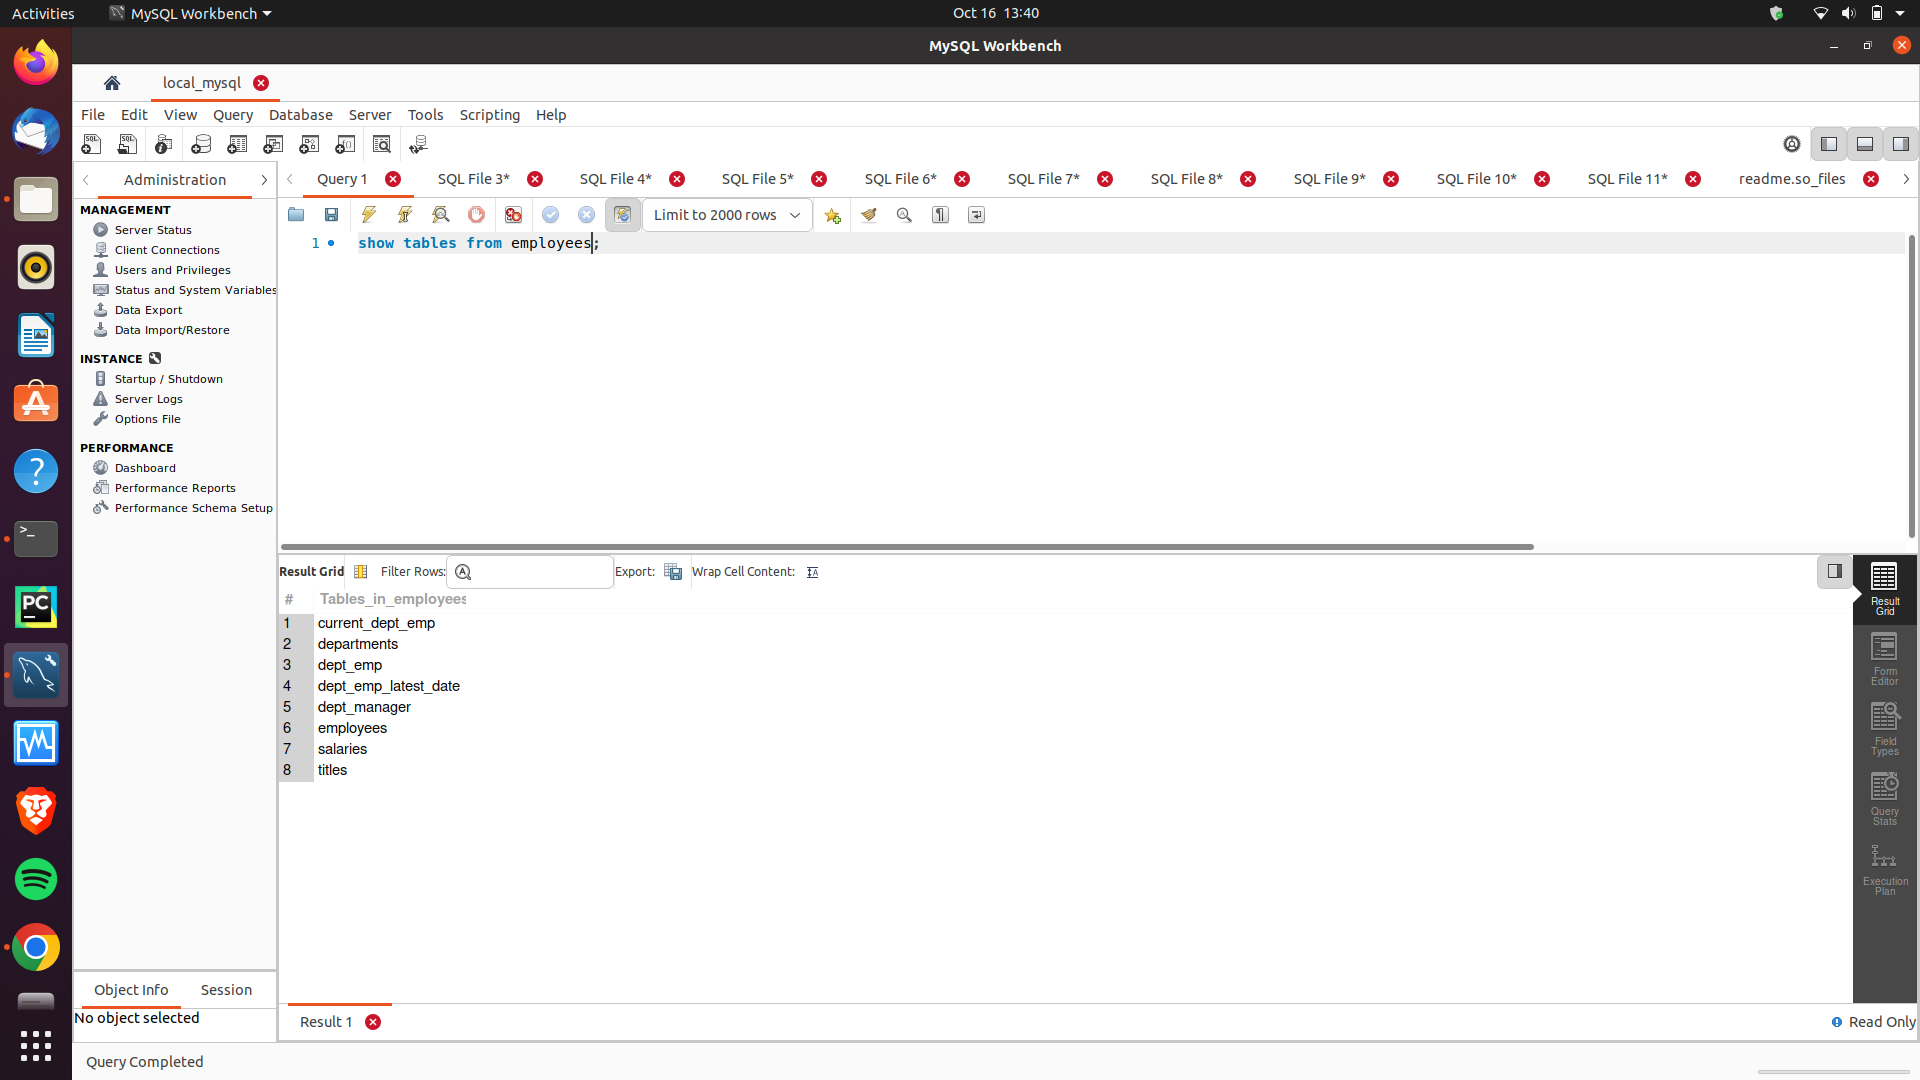

## Creation function for fetching data from employees database.

In [1]:
def mysql(query):
    import mysql.connector
    from mysql.connector import Error

    try:
        connection = mysql.connector.connect(host='localhost',
                                         database='employees',
                                         user='root',
                                         password='Elon2003')
        if connection.is_connected():
            db_Info = connection.get_server_info()
            cursor = connection.cursor()
            cursor.execute(query)
            record = cursor.fetchall()
            return record

    except Error as e:
        print("Error while connecting to MySQL", e)
    finally:
        if (connection.is_connected()):
            cursor.close()
            connection.close()
            print("MySQL connection is closed")

### Query1 -- The number of employees who have been department managers.

In [17]:
query1 = '''select 
	Count(distinct emp_no) as Department_Mangers
from titles 
where title  = 'Manager';'''

ans1 = mysql(query1)

MySQL connection is closed


In [18]:
print("There are total {} Employees have been Departments Manager".format(ans1[0]))

There are total (24,) Employees have been Departments Manager


### Query2 -- The number of employees who have only worked in one department.

In [16]:
query2 = '''With  t2 AS
	(SELECT distinct emp_no,
		Count(dept_no) OVER (Partition BY emp_no) AS no_of_work_dept
	FROM dept_emp)
Select 
	Count(emp_no) as total_emp
from t2
where no_of_work_dept = 1;'''

ans2 = mysql(query2)
ans2

MySQL connection is closed


[(268445,)]

In [20]:
print("There are {} No of Employees who have been anly worked in one department".format(ans2[0]))

There are (268445,) No of Employees who have been anly worked in one department


### Query3 -- The department who has had the most number of managers..

In [24]:
query3 = '''With  emp_dept_title AS
(
	SELECT
		dept_emp.emp_no,
		dept_emp.dept_no,
		departments.dept_name,
		titles.title
	FROM dept_emp
	Inner JOIN departments
		ON dept_emp.dept_no = departments.dept_no
	Inner JOIN titles
		ON titles.emp_no = dept_emp.emp_no
)
Select 
	dept_name, count(dept_name) As no_of_managers
    From emp_dept_title
    Where title = 'Manager'
    Group by dept_name
    Order By no_of_managers DESC;
'''

ans3 = mysql(query3)
ans3

MySQL connection is closed


[('Production', 4),
 ('Quality Management', 4),
 ('Customer Service', 4),
 ('Marketing', 2),
 ('Finance', 2),
 ('Human Resources', 2),
 ('Development', 2),
 ('Sales', 2),
 ('Research', 2)]

In [8]:
import pandas as pd

In [25]:
dept = []
no_of_manager = []
for i in ans3:
    dept.append(i[0])
    no_of_manager.append(i[1])
dicts = {'Departments':dept, 'No_of_Managers':no_of_manager}
pd.DataFrame(dicts)

,Departments,No_of_Managers
0,Production,4
1,Quality Management,4
2,Customer Service,4
3,Marketing,2
4,Finance,2
5,Human Resources,2
6,Development,2
7,Sales,2
8,Research,2


## Conclusion -- Production, Quality Management, Customer Service have a max no of Managers.

### Query4 -- The age group which has the highest average salary.

In [4]:
ans4 = mysql('''With t1 AS 
(
    SELECT 
		*,DATE_FORMAT(FROM_DAYS(DATEDIFF(now(),birth_date)), '%Y')+0 AS Age from employees
),
t2 AS 
(
	Select 
    distinct t1.emp_no, 
    t1.Age,
    sal.salary
    from t1
    Inner Join salaries as sal
    ON t1.emp_no = sal.emp_no

)
select 
	Distinct Age, Sum(Salary)/Count(emp_no) avg_group_salary
from t2
Group By Age
Order BY avg_group_salary DESC;
''')

ans4

MySQL connection is closed


[(70.0, Decimal('64038.1770')),
 (69.0, Decimal('64020.4616')),
 (59.0, Decimal('63946.4372')),
 (64.0, Decimal('63917.2195')),
 (63.0, Decimal('63877.5604')),
 (65.0, Decimal('63858.3773')),
 (60.0, Decimal('63741.3684')),
 (61.0, Decimal('63700.7168')),
 (68.0, Decimal('63685.3479')),
 (66.0, Decimal('63626.0175')),
 (58.0, Decimal('63610.7517')),
 (57.0, Decimal('63582.5582')),
 (62.0, Decimal('63537.5375')),
 (67.0, Decimal('63468.1036'))]

**Finding highest average salary between two group of ages 50-60, 60-70**

In [7]:
age = []
average_salary = []
for i in ans4:
    age.append(i[0])
    average_salary.append(int(i[1]))
dicts = {'Age':age, 'Average_Salary':average_salary}
pd.DataFrame(dicts)

,Age,Average_Salary
0,70.0,64038
1,69.0,64020
2,59.0,63946
3,64.0,63917
4,63.0,63877
5,65.0,63858
6,60.0,63741
7,61.0,63700
8,68.0,63685
9,66.0,63626


### Conclusion:--

**Employees who have age 70 getting an highest Salary** 

### Query5 --  All the rows of the ‘manager’ table twice.

### Self Joining dept manager table.

In [10]:
query5 = '''select 
	m1.*,
    m2.*
from dept_manager m1
Join dept_manager m2
On m1.dept_no = m2.dept_no'''

ans5 = mysql(query5)

MySQL connection is closed


In [11]:
ans5

[(110022,
  'd001',
  datetime.date(1985, 1, 1),
  datetime.date(1991, 10, 1),
  110022,
  'd001',
  datetime.date(1985, 1, 1),
  datetime.date(1991, 10, 1)),
 (110022,
  'd001',
  datetime.date(1985, 1, 1),
  datetime.date(1991, 10, 1),
  110039,
  'd001',
  datetime.date(1991, 10, 1),
  datetime.date(9999, 1, 1)),
 (110039,
  'd001',
  datetime.date(1991, 10, 1),
  datetime.date(9999, 1, 1),
  110022,
  'd001',
  datetime.date(1985, 1, 1),
  datetime.date(1991, 10, 1)),
 (110039,
  'd001',
  datetime.date(1991, 10, 1),
  datetime.date(9999, 1, 1),
  110039,
  'd001',
  datetime.date(1991, 10, 1),
  datetime.date(9999, 1, 1)),
 (110085,
  'd002',
  datetime.date(1985, 1, 1),
  datetime.date(1989, 12, 17),
  110085,
  'd002',
  datetime.date(1985, 1, 1),
  datetime.date(1989, 12, 17)),
 (110085,
  'd002',
  datetime.date(1985, 1, 1),
  datetime.date(1989, 12, 17),
  110114,
  'd002',
  datetime.date(1989, 12, 17),
  datetime.date(9999, 1, 1)),
 (110114,
  'd002',
  datetime.date(1989, 

In [41]:
import pandas as pd
emp_no = []
title1 = []
from_date = []
to_date = []
title2 = []
for i in ans5:
    emp_no.append(i[0])
    title1.append(i[1])
    from_date.append(str(i[2]))
    to_date.append(str(i[3]))
    title2.append(i[4])
dicts = {'Emp-No':emp_no, 'Title1':title1, 'from-date':from_date, 'to-date':to_date, 'Title2':title2}
pd.DataFrame(dicts)

,Emp-No,Title1,from-date,to-date,Title2
0,111939,Manager,1996-01-03,9999-01-01,Manager
1,111877,Manager,1992-09-08,1996-01-03,Manager
2,111784,Manager,1988-10-17,1992-09-08,Manager
3,111692,Manager,1985-01-01,1988-10-17,Manager
4,111534,Manager,1991-04-08,9999-01-01,Manager
...,...,...,...,...,...
571,110183,Manager,1985-01-01,1992-03-21,Manager
572,110114,Manager,1989-12-17,9999-01-01,Manager
573,110085,Manager,1985-01-01,1989-12-17,Manager
574,110039,Manager,1991-10-01,9999-01-01,Manager
